In [2]:
import pymongo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/wtitze/4E/main/ristoranti.csv")
df

,N,address,borough,cuisine,grades,name,restaurant_id
0,0,"{'building': '8825', 'coord': [-73.8803827, 40...",Queens,American,"[{'date': datetime.datetime(2014, 11, 15, 0, 0...",Brunos On The Boulevard,40356151
1,1,"{'building': '156-71', 'coord': [-73.840437, 4...",Queens,Pizza/Italian,"[{'date': datetime.datetime(2014, 10, 29, 0, 0...",New Park Pizzeria & Restaurant,40364744
2,2,"{'building': '6409', 'coord': [-74.00528899999...",Brooklyn,American,"[{'date': datetime.datetime(2014, 7, 18, 0, 0)...",Regina Caterers,40356649
3,3,"{'building': '2491', 'coord': [-74.1459332, 40...",Staten Island,Delicatessen,"[{'date': datetime.datetime(2015, 1, 9, 0, 0),...",Bagels N Buns,40363427
4,4,"{'building': '56', 'coord': [-74.004758, 40.74...",Manhattan,American,"[{'date': datetime.datetime(2014, 6, 10, 0, 0)...",Old Homestead,40364715
...,...,...,...,...,...,...,...
25354,25354,"{'building': 'ONE', 'coord': [-81.664363600000...",Queens,Other,[],Camden Food Express,50018316
25355,25355,"{'building': '700', 'coord': [-73.988230600000...",Manhattan,Other,[],Wooly'S Nyc,50018495
25356,25356,"{'building': '2144', 'coord': [-73.9552561, 40...",Manhattan,Other,[],Rafi 786,50018553
25357,25357,"{'building': '1448', 'coord': [-73.93032629999...",Brooklyn,Other,[],NaN,50018721


In [4]:
df.drop(df.columns.difference(["borough","cuisine","name"]),1,inplace=True)
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


In [5]:
df[df["borough"]=="Missing"].count()["borough"]

51

In [6]:
df = df.replace("Missing", np.nan)

In [7]:
df.dropna() 

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25353,Manhattan,Japanese,Maid Cafe
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786


In [8]:
#df1=df.groupby("cuisine")["name"].count().sort_values(ascending=False)
#df1
df['cuisine'].value_counts()

American           6183
Chinese            2418
Café/Coffee/Tea    1214
Pizza              1163
Italian            1069
                   ... 
Iranian               2
Californian           1
Polynesian            1
Creole/Cajun          1
Chilean               1
Name: cuisine, Length: 85, dtype: int64

In [9]:
maxKit = df['cuisine'].value_counts()
maxKit[maxKit == maxKit.max()]

American    6183
Name: cuisine, dtype: int64

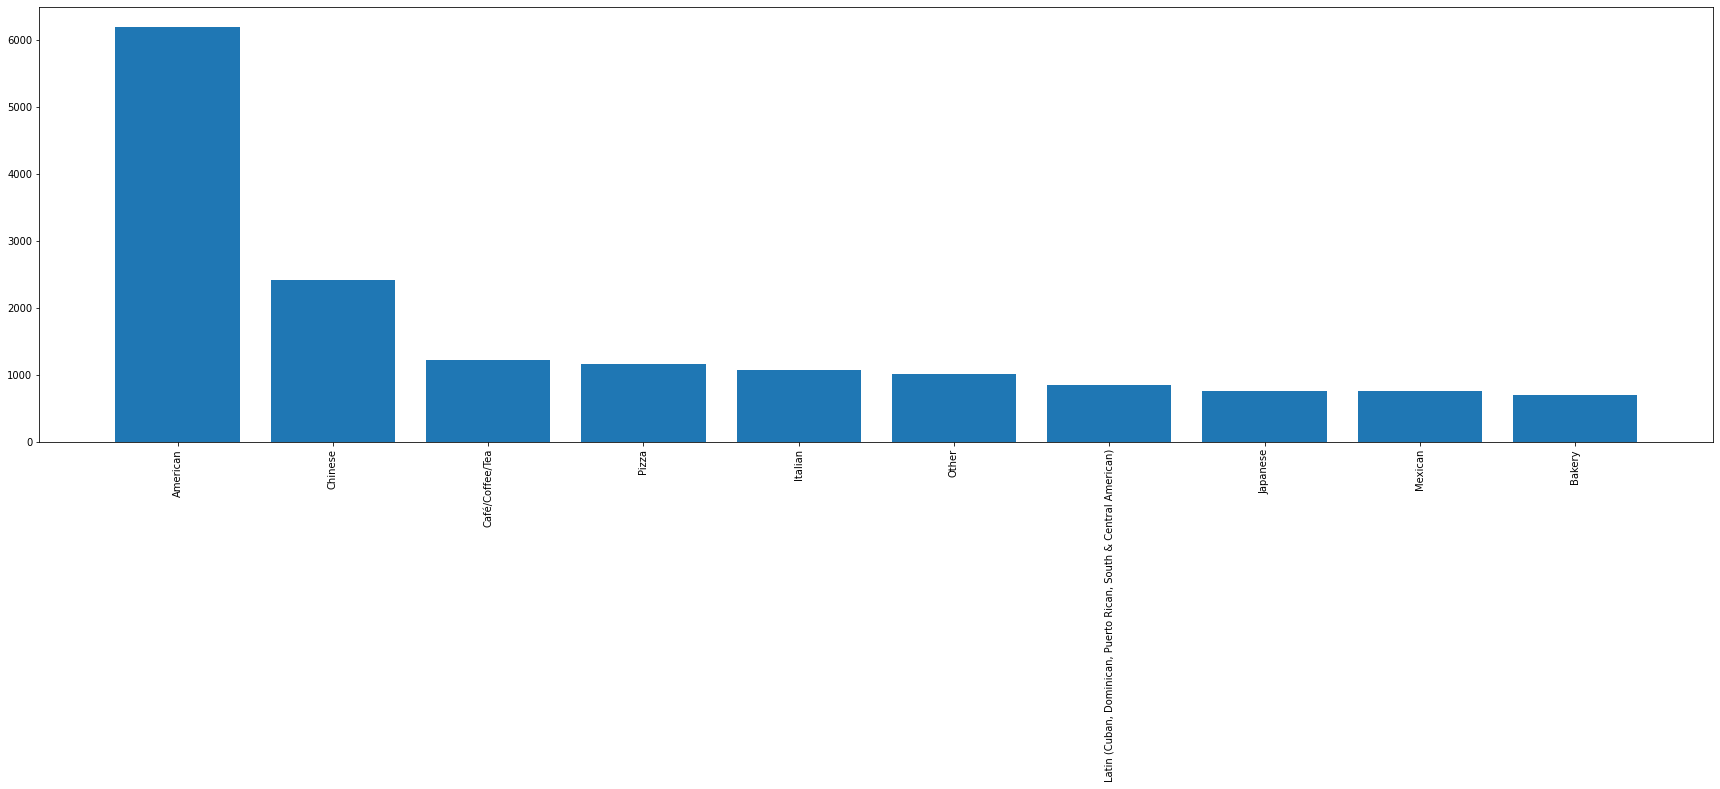

In [10]:
fig,ax = plt.subplots(figsize=(30,8))
ax.bar(maxKit.index[:10],maxKit[:10])
plt.xticks(rotation=90)
plt.show()

In [11]:
borough = df['borough'].value_counts()
borough

Manhattan        10259
Brooklyn          6086
Queens            5656
Bronx             2338
Staten Island      969
Name: borough, dtype: int64

In [12]:
borough.index

Index(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'], dtype='object')

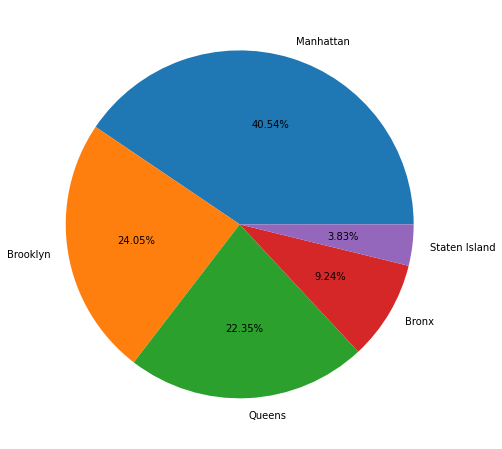

In [13]:
fig,ax = plt.subplots(figsize=(8,8))
ax.pie(borough,autopct= '%.2f%%',labels=borough.index)
plt.show()

In [14]:
maxKit.index[:10]

Index(['American', 'Chinese', 'Café/Coffee/Tea', 'Pizza', 'Italian', 'Other',
       'Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
       'Japanese', 'Mexican', 'Bakery'],
      dtype='object')

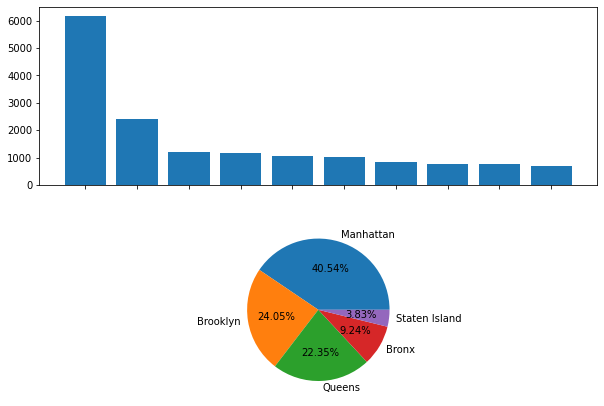

<Figure size 432x288 with 0 Axes>

In [15]:
fig,ax = plt.subplots(2,1,figsize=(10,8))
ax[0].bar(maxKit.index[:10],maxKit[:10])
ax[1].pie(borough,autopct= '%.2f%%',labels=borough.index)

fig.autofmt_xdate(rotation=90)
plt.show()
plt.savefig("risultati1.pdf")

In [16]:
plt.savefig("risultati.pdf")

<Figure size 432x288 with 0 Axes>

In [17]:
df["cuisine"].loc[df['cuisine'] !="American"] ='non American'
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,non American,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,non American,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,non American,Camden Food Express
25355,Manhattan,non American,Wooly'S Nyc
25356,Manhattan,non American,Rafi 786
25357,Brooklyn,non American,NaN


In [18]:
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,non American,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,non American,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,non American,Camden Food Express
25355,Manhattan,non American,Wooly'S Nyc
25356,Manhattan,non American,Rafi 786
25357,Brooklyn,non American,NaN


In [19]:
df.groupby(['borough', 'cuisine']).count()

name
borough       cuisine           
Bronx         American       411
              non American  1911
Brooklyn      American      1273
              non American  4773
Manhattan     American      3205
              non American  7006
Queens        American      1040
              non American  4575
Staten Island American       244
              non American   719

In [20]:
df2 = df.groupby(['borough', 'cuisine']).size().unstack()
df2

cuisine,American,non American
borough,,
Bronx,411,1927
Brooklyn,1273,4813
Manhattan,3205,7054
Queens,1040,4616
Staten Island,244,725


In [21]:
df2['American']

borough
Bronx             411
Brooklyn         1273
Manhattan        3205
Queens           1040
Staten Island     244
Name: American, dtype: int64

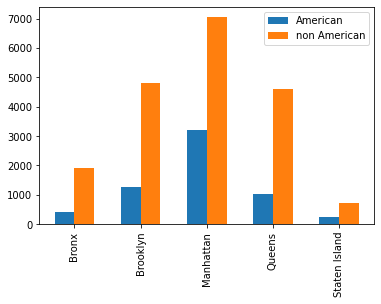

In [22]:
dfList = df2.index.tolist()
lblLoc = np.arange(len(dfList))  
width = 0.30 
fig,ax = plt.subplots()
ax.bar(lblLoc - width/2,df2['American'],width)
ax.bar(lblLoc + width/2,df2['non American'],width)
plt.xticks(lblLoc, dfList)
plt.xticks(rotation=90)
ax.legend(["American",'non American'])